<a href="https://colab.research.google.com/github/suheon927/PerceptronPractice/blob/main/MultiLayerPerceprton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

train data 개수 :  60000
train label 개수 :  60000
test data 개수 :  10000
test label 개수 :  10000


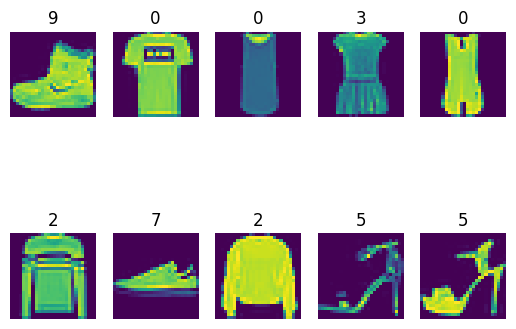

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.6205 - loss: 1.2844
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7862 - loss: 0.6808
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.8071 - loss: 0.6039
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8186 - loss: 0.5655
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8258 - loss: 0.5338
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8276 - loss: 0.5188
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8339 - loss: 0.5011
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8360 - loss: 0.4895
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8393 - loss: 0.4813
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8409 - loss: 0.4734
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8430 - loss: 0.4707
Epoch 12/20
1875/1

In [ ]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = x_train/255.0, x_test/255.0

print("train data 개수 : ", len(x_train))
print("train label 개수 : ", len(y_train))
print("test data 개수 : ", len(x_test))
print("test label 개수 : ", len(y_test))

import matplotlib.pyplot as plt

for i in range(10):
  sp = plt.subplot(2, 5, i + 1)
  sp.axis('Off')
  img = x_train[i]
  plt.imshow(img)
  plt.title(y_train[i])

plt.show()

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adagrad',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, epochs=20)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

plt.plot(acc, 'bo', label='Training accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(loss, 'go', label='Training Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()